In [ ]:
!pip install ultralytics opencv-python fastapi uvicorn python-multipart streamlit matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 132.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 139.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211

In [ ]:
!unzip /content/Dataset.zip -d /content/dataset

Archive:  /content/Dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Dataset.zip or
        /content/Dataset.zip.zip, and cannot find /content/Dataset.zip.ZIP, period.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_zip_path = "/content/drive/MyDrive/Dataset.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

In [ ]:
!ls /content/dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!cat /content/dataset/data.yaml

train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 2
names: ['minor', 'moderate']

roboflow:
  workspace: projects-by-samu-idhayan
  project: road-accident-detection-8snos
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/projects-by-samu-idhayan/road-accident-detection-8snos/dataset/3

In [ ]:
import cv2
import os
import numpy as np
from glob import glob

input_dir = 'images/train'
output_dir = 'images/train_enhanced'
os.makedirs(output_dir, exist_ok=True)

def simulate_low_light(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[..., 2] = hsv[..., 2] * 0.4  # reduce brightness
    dark_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    noise = np.random.normal(0, 25, dark_img.shape).astype(np.uint8)
    return cv2.add(dark_img, noise)

for path in glob(f"{input_dir}/*.jpg"):
    img = cv2.imread(path)
    dark_img = simulate_low_light(img)
    cv2.imwrite(os.path.join(output_dir, os.path.basename(path)), dark_img)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")  # You can use yolov8s or yolov8m for better accuracy
model.train(data="/content/dataset/data.yaml", epochs=100, imgsz=640, device=0)

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /content/dataset/train/labels.cache... 2768 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2768/2768 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 492.9±256.0 MB/s, size: 36.5 KB)


val: Scanning /content/dataset/valid/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.66G      3.166       3.76      4.003         91        640: 100%|██████████| 173/173 [00:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        485        486     0.0175     0.0717    0.00648    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.66G        2.7      3.353      3.199         59        640: 100%|██████████| 173/173 [00:47<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]


                   all        485        486      0.523     0.0191    0.00787    0.00282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.66G      2.194      3.015      2.737         80        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]


                   all        485        486      0.485      0.104     0.0288     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.66G      1.863      2.636      2.408         76        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]


                   all        485        486      0.549     0.0611     0.0419     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.66G      1.675      2.402      2.204         51        640: 100%|██████████| 173/173 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]

                   all        485        486       0.27      0.185     0.0575     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.66G      1.558      2.242      2.105         72        640: 100%|██████████| 173/173 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]


                   all        485        486      0.145      0.478       0.15     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.66G       1.46      2.126      2.004         68        640: 100%|██████████| 173/173 [00:47<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all        485        486      0.608      0.145      0.145     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.66G      1.394      2.049       1.94         59        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        485        486      0.214      0.438      0.169     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.66G      1.353      1.972      1.893         80        640: 100%|██████████| 173/173 [00:47<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


                   all        485        486      0.595      0.176      0.145     0.0603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.66G      1.309      1.913      1.847         75        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]

                   all        485        486      0.175      0.432      0.174      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.66G      1.265      1.877      1.813         50        640: 100%|██████████| 173/173 [00:49<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.17it/s]

                   all        485        486      0.178      0.501      0.205      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.66G       1.24      1.815      1.782         58        640: 100%|██████████| 173/173 [00:46<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]

                   all        485        486      0.189      0.443      0.214      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.66G      1.218      1.782      1.759         72        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.19it/s]

                   all        485        486      0.627      0.141      0.214      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.66G      1.212      1.759      1.744         72        640: 100%|██████████| 173/173 [00:49<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]

                   all        485        486      0.179      0.485      0.178     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.66G      1.181       1.72      1.721         92        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]

                   all        485        486      0.209      0.508      0.208      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.66G      1.165      1.692      1.705         68        640: 100%|██████████| 173/173 [00:46<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all        485        486      0.207      0.514      0.239       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.66G      1.142      1.669      1.684         75        640: 100%|██████████| 173/173 [00:48<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]

                   all        485        486      0.233      0.591      0.257      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.66G      1.138      1.664      1.687         69        640: 100%|██████████| 173/173 [00:49<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]

                   all        485        486      0.246      0.387      0.195     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.66G      1.134      1.648      1.658         62        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]

                   all        485        486      0.314      0.419      0.194     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.66G      1.106      1.602      1.655         58        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

                   all        485        486      0.279      0.526      0.247      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.66G      1.097      1.578      1.647         64        640: 100%|██████████| 173/173 [00:48<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all        485        486      0.264      0.507      0.255      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.66G      1.095      1.577      1.644         77        640: 100%|██████████| 173/173 [00:46<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]

                   all        485        486      0.222       0.56      0.208      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.66G      1.066      1.548      1.611         62        640: 100%|██████████| 173/173 [00:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]


                   all        485        486      0.277      0.524      0.242      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.66G      1.049      1.537      1.599         67        640: 100%|██████████| 173/173 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all        485        486      0.239      0.617      0.256       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.66G      1.075      1.541      1.612         65        640: 100%|██████████| 173/173 [00:48<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.04it/s]

                   all        485        486      0.321      0.463       0.25      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.68G      1.038      1.494      1.579         61        640: 100%|██████████| 173/173 [00:46<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]


                   all        485        486      0.268      0.585      0.275       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.69G      1.037      1.479      1.578         63        640: 100%|██████████| 173/173 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all        485        486      0.237      0.515      0.275       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.7G      1.004      1.429      1.553         57        640: 100%|██████████| 173/173 [00:51<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]

                   all        485        486      0.252      0.521       0.25      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.7G      1.012      1.441      1.557         46        640: 100%|██████████| 173/173 [00:48<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]

                   all        485        486      0.272      0.563      0.295      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.7G      1.009      1.436      1.549         71        640: 100%|██████████| 173/173 [00:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]

                   all        485        486      0.228      0.577      0.254      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.7G     0.9847      1.404      1.539         65        640: 100%|██████████| 173/173 [00:49<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]

                   all        485        486       0.28      0.513      0.276      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.7G     0.9891      1.407      1.539         54        640: 100%|██████████| 173/173 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.10it/s]

                   all        485        486      0.307      0.498      0.265      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.7G     0.9834        1.4      1.528         59        640: 100%|██████████| 173/173 [00:50<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.20it/s]

                   all        485        486      0.233      0.605      0.268      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.7G     0.9697      1.367      1.515         71        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        485        486      0.252      0.556      0.276      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.7G      0.956       1.37      1.506         82        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]


                   all        485        486      0.279      0.551      0.282      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.7G     0.9503      1.376      1.504         72        640: 100%|██████████| 173/173 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.11it/s]

                   all        485        486      0.269      0.573      0.294      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.7G     0.9621      1.357      1.509         73        640: 100%|██████████| 173/173 [00:50<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]

                   all        485        486      0.251      0.607      0.277      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.71G     0.9491       1.34      1.495         75        640: 100%|██████████| 173/173 [00:50<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]

                   all        485        486      0.242      0.627      0.279      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.71G      0.942      1.335      1.489         71        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        485        486      0.224      0.654       0.27      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.71G      0.932      1.322      1.471         87        640: 100%|██████████| 173/173 [00:46<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all        485        486      0.259       0.63       0.31       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.71G     0.9217      1.306      1.471         74        640: 100%|██████████| 173/173 [00:48<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]

                   all        485        486      0.255      0.623      0.295      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.71G     0.9297      1.309      1.477         74        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        485        486       0.28      0.632      0.316      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.71G     0.9223      1.288      1.468         64        640: 100%|██████████| 173/173 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

                   all        485        486      0.269      0.602      0.292      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.71G     0.9214      1.269      1.468         80        640: 100%|██████████| 173/173 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]

                   all        485        486      0.228      0.647      0.298      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.71G     0.9197      1.289      1.463         81        640: 100%|██████████| 173/173 [00:48<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.14it/s]

                   all        485        486       0.29      0.588      0.289      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.71G      0.894      1.256      1.441         80        640: 100%|██████████| 173/173 [00:48<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

                   all        485        486      0.298      0.579      0.295      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.71G     0.8914      1.259      1.435         43        640: 100%|██████████| 173/173 [00:46<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

                   all        485        486      0.262      0.591      0.281      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.71G     0.8907      1.259       1.44         73        640: 100%|██████████| 173/173 [00:48<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.13it/s]

                   all        485        486      0.271      0.571      0.297      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.71G     0.8835      1.242      1.432         72        640: 100%|██████████| 173/173 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]

                   all        485        486      0.258      0.592      0.282      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.71G     0.9019      1.254       1.44         78        640: 100%|██████████| 173/173 [00:48<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.65it/s]

                   all        485        486      0.281      0.551      0.269       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.71G     0.8912      1.235      1.432         59        640: 100%|██████████| 173/173 [00:49<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all        485        486      0.277      0.658      0.291      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.71G      0.852      1.194      1.409         55        640: 100%|██████████| 173/173 [00:49<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]

                   all        485        486      0.299      0.567      0.293      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.71G     0.8654      1.203      1.413         84        640: 100%|██████████| 173/173 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]

                   all        485        486      0.303      0.618      0.301      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.71G     0.8599       1.21       1.41         75        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all        485        486      0.317      0.631      0.317      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.71G     0.8595      1.201      1.407         69        640: 100%|██████████| 173/173 [00:49<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.11it/s]

                   all        485        486      0.246      0.677      0.281      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.71G     0.8512      1.183      1.402         60        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]

                   all        485        486      0.317      0.616      0.302      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.71G      0.849      1.175      1.402         65        640: 100%|██████████| 173/173 [00:46<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        485        486      0.274       0.63        0.3      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.71G     0.8605      1.183       1.41         58        640: 100%|██████████| 173/173 [00:48<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]

                   all        485        486      0.277      0.637        0.3      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.71G     0.8446      1.179      1.396         62        640: 100%|██████████| 173/173 [00:49<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all        485        486      0.294      0.638      0.305      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.71G     0.8368      1.153      1.389         63        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        485        486      0.294      0.601      0.293      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.73G     0.8383       1.15      1.386         66        640: 100%|██████████| 173/173 [00:47<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]

                   all        485        486      0.312      0.639      0.308      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.74G      0.848      1.143      1.392         59        640: 100%|██████████| 173/173 [00:47<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all        485        486      0.292      0.608      0.294      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.74G     0.8173      1.114      1.368         60        640: 100%|██████████| 173/173 [00:47<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

                   all        485        486      0.297      0.623      0.311      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.74G     0.8238       1.13       1.37         69        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        485        486      0.298      0.616      0.302      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.74G     0.8233      1.131      1.367         60        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]

                   all        485        486      0.285      0.635      0.297       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.74G     0.8082      1.118      1.364         78        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        485        486      0.294      0.645      0.319      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.74G     0.8196      1.118      1.367         68        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]

                   all        485        486      0.296      0.597      0.295      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.74G     0.8089       1.13      1.358         73        640: 100%|██████████| 173/173 [00:47<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]

                   all        485        486      0.276      0.617      0.305      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.74G     0.8046      1.096      1.356         74        640: 100%|██████████| 173/173 [00:47<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.12it/s]

                   all        485        486      0.282      0.631      0.297      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.74G     0.8034      1.095      1.353         51        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]

                   all        485        486      0.276      0.622      0.298      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.74G     0.7859      1.087      1.339         59        640: 100%|██████████| 173/173 [00:46<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]

                   all        485        486      0.291      0.642      0.313      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.74G     0.7906      1.082       1.34         59        640: 100%|██████████| 173/173 [00:47<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]

                   all        485        486      0.281      0.613      0.295      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.74G      0.791      1.088      1.343         77        640: 100%|██████████| 173/173 [00:46<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]


                   all        485        486      0.304      0.592      0.326      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.74G     0.7947      1.081      1.341         61        640: 100%|██████████| 173/173 [00:48<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all        485        486      0.319      0.612      0.332      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.74G     0.7759      1.062      1.329         75        640: 100%|██████████| 173/173 [00:46<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

                   all        485        486      0.316      0.578      0.328      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.74G     0.7781      1.057       1.33         62        640: 100%|██████████| 173/173 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

                   all        485        486      0.301      0.592      0.321      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.74G     0.7703      1.052      1.325         85        640: 100%|██████████| 173/173 [00:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]

                   all        485        486      0.281        0.6      0.312      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.74G     0.7716      1.048      1.328         63        640: 100%|██████████| 173/173 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.70it/s]

                   all        485        486      0.283      0.554       0.31      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.74G     0.7739      1.048      1.325         57        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.00it/s]

                   all        485        486      0.279      0.589      0.333      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.74G     0.7577      1.046      1.313         77        640: 100%|██████████| 173/173 [00:47<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]

                   all        485        486       0.31      0.632       0.33       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.74G     0.7604      1.024      1.311         75        640: 100%|██████████| 173/173 [00:46<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]

                   all        485        486      0.276      0.543      0.316      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.74G     0.7509      1.046      1.302         62        640: 100%|██████████| 173/173 [00:46<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]

                   all        485        486      0.291      0.592      0.318      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.74G     0.7553      1.029      1.309         66        640: 100%|██████████| 173/173 [00:49<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all        485        486       0.27      0.546      0.312       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.74G     0.7469      1.022      1.307         72        640: 100%|██████████| 173/173 [00:48<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.08it/s]

                   all        485        486      0.308      0.545       0.32      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.74G     0.7594      1.036      1.309         53        640: 100%|██████████| 173/173 [00:48<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]


                   all        485        486      0.293      0.615      0.344      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.74G     0.7452      1.009      1.305         67        640: 100%|██████████| 173/173 [00:47<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]

                   all        485        486      0.309      0.589       0.32      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.74G     0.7415      1.001      1.298         85        640: 100%|██████████| 173/173 [00:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.19it/s]

                   all        485        486      0.334      0.565      0.329      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.74G     0.7398      1.002      1.295         55        640: 100%|██████████| 173/173 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]

                   all        485        486      0.309      0.584      0.351      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.74G     0.7379      1.002      1.295         74        640: 100%|██████████| 173/173 [00:46<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]

                   all        485        486      0.336      0.543      0.334      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.74G     0.7237     0.9966      1.286         73        640: 100%|██████████| 173/173 [00:48<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.13it/s]

                   all        485        486      0.293      0.575       0.33      0.199


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.74G     0.6803     0.8735       1.23         39        640: 100%|██████████| 173/173 [00:45<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all        485        486      0.342      0.567      0.337      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.74G     0.6663     0.8356      1.219         34        640: 100%|██████████| 173/173 [00:44<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]

                   all        485        486      0.349      0.585      0.347      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.74G     0.6505     0.8163      1.211         38        640: 100%|██████████| 173/173 [00:44<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]

                   all        485        486      0.344      0.585      0.344      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.74G     0.6568     0.8237      1.218         40        640: 100%|██████████| 173/173 [00:44<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

                   all        485        486      0.331      0.544       0.33      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.74G     0.6497     0.8247      1.206         35        640: 100%|██████████| 173/173 [00:44<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all        485        486      0.329      0.559      0.333      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.74G     0.6523     0.8193      1.209         34        640: 100%|██████████| 173/173 [00:46<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        485        486      0.331      0.592      0.344      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.74G     0.6452     0.8193      1.203         34        640: 100%|██████████| 173/173 [00:44<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]

                   all        485        486      0.348      0.559      0.344      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.74G     0.6365     0.8039      1.197         38        640: 100%|██████████| 173/173 [00:46<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]

                   all        485        486      0.348       0.57       0.35      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.74G     0.6312     0.7962      1.194         33        640: 100%|██████████| 173/173 [00:46<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.76it/s]

                   all        485        486      0.355       0.55       0.35      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.74G     0.6298     0.7894      1.192         38        640: 100%|██████████| 173/173 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.12it/s]

                   all        485        486      0.337      0.553      0.353       0.21



100 epochs completed in 1.458 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]


                   all        485        486      0.338      0.555      0.351       0.21
                 minor        131        131      0.117      0.802      0.214      0.132
              moderate        355        355      0.559      0.308      0.489      0.287
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78361ebc94d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

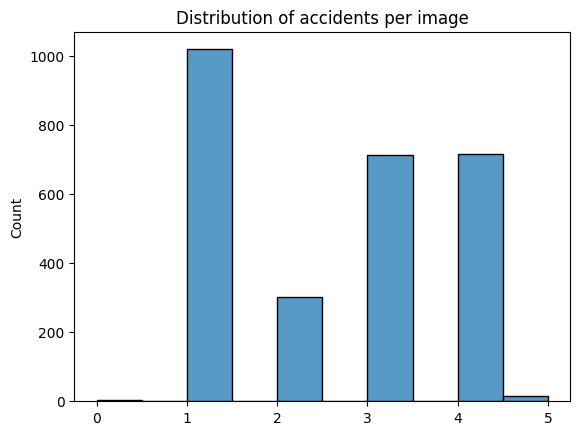

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming label files contain one object per line with format: class x_center y_center width height
label_files = glob('/content/dataset/train/labels/*.txt')

accident_counts = [len(open(f).readlines()) for f in label_files]
sns.histplot(accident_counts, bins=10)
plt.title("Distribution of accidents per image")
plt.show()

In [ ]:
def compute_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return np.mean(hsv[..., 2])

def compute_motion(prev_frame, curr_frame):
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                        None, 0.5, 3, 15, 3, 5, 1.2, 0)
    return np.mean(np.linalg.norm(flow, axis=2))

In [ ]:
!ls /content/runs/detect/train/weights/

In [ ]:
!find /content -name '*.pt'

/content/yolo11n.pt
/content/runs/detect/train3/weights/best.pt
/content/runs/detect/train3/weights/last.pt
/content/runs/detect/train2/weights/best.pt
/content/runs/detect/train2/weights/last.pt


In [ ]:
model = YOLO("/content/runs/detect/train3/weights/best.pt")
results = model.predict("/content/images/sample_videos/videoplayback.mp4", save=True, conf=0.5)

NameError: name 'YOLO' is not defined

In [ ]:
!ffmpeg -i /content/runs/detect/predict/sample_video.avi -vcodec libx264 /content/runs/detect/predict/sample_video.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video("/content/runs/detect/predict/sample_video.mp4", embed=False)  # adjust if the path is different

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train3/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>